In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

Using TensorFlow backend.
/home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np

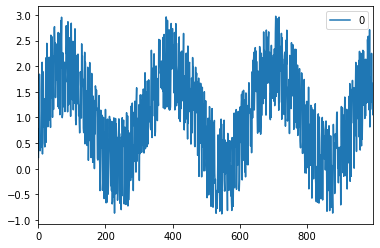

In [2]:
N = 1000  
Tp = 800    

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.plot()

In [3]:
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

train

array([[ 2.20223348e-01],
       [ 7.78343637e-01],
       [ 6.62518922e-01],
       [ 1.84314583e+00],
       [ 1.51280920e+00],
       [ 3.50366031e-01],
       [ 4.29191580e-01],
       [ 4.80169194e-01],
       [ 4.21914506e-01],
       [ 4.58296762e-01],
       [ 1.24719625e+00],
       [ 2.07598790e+00],
       [ 2.87468006e-01],
       [ 1.89641511e+00],
       [ 1.03253192e+00],
       [ 8.09243803e-01],
       [ 1.36829206e+00],
       [ 1.12461239e+00],
       [ 4.96722720e-01],
       [ 4.24981874e-01],
       [ 7.17049075e-01],
       [ 1.32768724e+00],
       [ 2.16168830e+00],
       [ 5.16072536e-01],
       [ 1.16714981e+00],
       [ 2.44594095e+00],
       [ 1.36955664e+00],
       [ 9.91140516e-01],
       [ 8.18730382e-01],
       [ 1.35741020e+00],
       [ 9.36653608e-01],
       [ 1.84377327e+00],
       [ 2.17504844e+00],
       [ 1.97748887e+00],
       [ 1.08760873e+00],
       [ 1.16527748e+00],
       [ 8.05713490e-01],
       [ 2.60503859e+00],
       [ 1.3

In [4]:
step = 2
# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

In [5]:
train

array([ 2.20223348e-01,  7.78343637e-01,  6.62518922e-01,  1.84314583e+00,
        1.51280920e+00,  3.50366031e-01,  4.29191580e-01,  4.80169194e-01,
        4.21914506e-01,  4.58296762e-01,  1.24719625e+00,  2.07598790e+00,
        2.87468006e-01,  1.89641511e+00,  1.03253192e+00,  8.09243803e-01,
        1.36829206e+00,  1.12461239e+00,  4.96722720e-01,  4.24981874e-01,
        7.17049075e-01,  1.32768724e+00,  2.16168830e+00,  5.16072536e-01,
        1.16714981e+00,  2.44594095e+00,  1.36955664e+00,  9.91140516e-01,
        8.18730382e-01,  1.35741020e+00,  9.36653608e-01,  1.84377327e+00,
        2.17504844e+00,  1.97748887e+00,  1.08760873e+00,  1.16527748e+00,
        8.05713490e-01,  2.60503859e+00,  1.37830694e+00,  1.97509260e+00,
        2.57587514e+00,  1.68916222e+00,  1.00201540e+00,  1.99935802e+00,
        2.19274596e+00,  1.15665083e+00,  2.22704035e+00,  2.74439003e+00,
        2.77112118e+00,  2.37959741e+00,  2.45383759e+00,  1.38701215e+00,
        1.76703776e+00,  

In [6]:
# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

In [7]:
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)

In [8]:
trainX

array([[ 0.22022335,  0.77834364],
       [ 0.77834364,  0.66251892],
       [ 0.66251892,  1.84314583],
       ...,
       [ 1.24011682,  1.17797805],
       [ 1.17797805, -0.08593755],
       [-0.08593755, -0.08593755]])

In [9]:
trainX.shape

(800, 2)

In [10]:
trainY

array([ 6.62518922e-01,  1.84314583e+00,  1.51280920e+00,  3.50366031e-01,
        4.29191580e-01,  4.80169194e-01,  4.21914506e-01,  4.58296762e-01,
        1.24719625e+00,  2.07598790e+00,  2.87468006e-01,  1.89641511e+00,
        1.03253192e+00,  8.09243803e-01,  1.36829206e+00,  1.12461239e+00,
        4.96722720e-01,  4.24981874e-01,  7.17049075e-01,  1.32768724e+00,
        2.16168830e+00,  5.16072536e-01,  1.16714981e+00,  2.44594095e+00,
        1.36955664e+00,  9.91140516e-01,  8.18730382e-01,  1.35741020e+00,
        9.36653608e-01,  1.84377327e+00,  2.17504844e+00,  1.97748887e+00,
        1.08760873e+00,  1.16527748e+00,  8.05713490e-01,  2.60503859e+00,
        1.37830694e+00,  1.97509260e+00,  2.57587514e+00,  1.68916222e+00,
        1.00201540e+00,  1.99935802e+00,  2.19274596e+00,  1.15665083e+00,
        2.22704035e+00,  2.74439003e+00,  2.77112118e+00,  2.37959741e+00,
        2.45383759e+00,  1.38701215e+00,  1.76703776e+00,  2.27516228e+00,
        2.43095380e+00,  

In [11]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape
(800, 1, 4) 

(800, 1, 4)

In [12]:
trainX

array([[[ 0.22022335,  0.77834364]],

       [[ 0.77834364,  0.66251892]],

       [[ 0.66251892,  1.84314583]],

       ...,

       [[ 1.24011682,  1.17797805]],

       [[ 1.17797805, -0.08593755]],

       [[-0.08593755, -0.08593755]]])

In [13]:
trainY

array([ 6.62518922e-01,  1.84314583e+00,  1.51280920e+00,  3.50366031e-01,
        4.29191580e-01,  4.80169194e-01,  4.21914506e-01,  4.58296762e-01,
        1.24719625e+00,  2.07598790e+00,  2.87468006e-01,  1.89641511e+00,
        1.03253192e+00,  8.09243803e-01,  1.36829206e+00,  1.12461239e+00,
        4.96722720e-01,  4.24981874e-01,  7.17049075e-01,  1.32768724e+00,
        2.16168830e+00,  5.16072536e-01,  1.16714981e+00,  2.44594095e+00,
        1.36955664e+00,  9.91140516e-01,  8.18730382e-01,  1.35741020e+00,
        9.36653608e-01,  1.84377327e+00,  2.17504844e+00,  1.97748887e+00,
        1.08760873e+00,  1.16527748e+00,  8.05713490e-01,  2.60503859e+00,
        1.37830694e+00,  1.97509260e+00,  2.57587514e+00,  1.68916222e+00,
        1.00201540e+00,  1.99935802e+00,  2.19274596e+00,  1.15665083e+00,
        2.22704035e+00,  2.74439003e+00,  2.77112118e+00,  2.37959741e+00,
        2.45383759e+00,  1.38701215e+00,  1.76703776e+00,  2.27516228e+00,
        2.43095380e+00,  

In [19]:
# SimpleRNN model
model = Sequential()
model.add(SimpleRNN(units=32, return_sequences=True, input_shape=(1,2), activation="relu"))
model.add(SimpleRNN(units=10,  return_sequences=True, activation="relu"))
model.add(Dense(8, activation="sigmoid")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_11 (SimpleRNN)    (None, 1, 32)             1120      
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 1, 10)             430       
_________________________________________________________________
dense_5 (Dense)              (None, 1, 8)              88        
_________________________________________________________________
dense_6 (Dense)              (None, 1, 1)              9         
Total params: 1,647
Trainable params: 1,647
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)


In [ ]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

In [ ]:

index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show() 